In [14]:
# basic module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import shutil
import glob
import time
import pickle

plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = False


# image module
import cv2
from pydicom import dcmread
import pylibjpeg
from PIL import Image
import pydicom as dcm
from pydicom import dcmread
from pydicom.data import get_testdata_file



# dataset
df = pd.read_csv('dataset.csv',index_col=0)

In [237]:
import os
import glob

In [236]:
path= '/home/ncp/workspace/data/DL/d1'
d1= os.listdir(path)
# d1

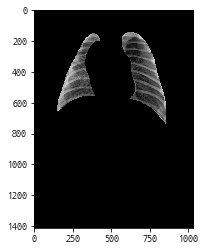

In [172]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img1= cv2.imread(path+'/'+d1[0])
plt.imshow(img1)


In [234]:
# img1.shape

In [235]:
# height, width = img1.shape[:2]

In [175]:
img_gray  = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

In [176]:
_, img_binary  = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
# img_binary = cv2.bitwise_not(img_binary)

In [177]:
contours, hierarchy = cv2.findContours(img_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)

In [233]:
# print(contours[0])  #왼
# print(contours[1])  #오

In [179]:
# for i, contour in enumerate(contours):
#     cv2.drawContours(img1, [contour],0,(0,255,0),2)
#     cv2.putText(img1, str(i), tuple(contour[0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0,255,0),1)
#     print(hierarchy[0][i])
 
# x, y, w, h = cv2.boundingRect(contours[0])
# cv2.rectangle(img1,(x,y),(x+w, y+h),(0,0,255), 1) # red
 
# cv2.imshow('img1', img1)
# # cv2.waitKey()
# # cv2.destroyAllWindows()

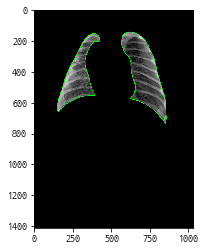

In [180]:
cv2.drawContours(image=img1, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)

# see the results
plt.imshow(img1)


In [181]:
# contours[i] -> contour
for i, contour in enumerate(contours):
#     cv2.drawContours(img1, [contour],0,None,2)    # (0,255,0) 초록색으로 안하고 걍 None 으로 줘서 투명색
#     cnt1 = contours[0]
#     cnt2 = contours[1]
#     cv2.drawContours(img_binary, [cnt1, cnt2], 0, None, 2)
    cv2.drawContours(image=img1, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)
    
#     cv2.putText(img1, str(i), tuple(contour[0][0]), cv2.FONT_HERSHEY_COMPLEX, 0.8, (0,255,0),1)
#     print(count, hierarchy[0][i])
    # cv2.imshow('src',img_src)
    # cv2.waitKey()

In [182]:
# num0 = 0 왼쪽
contours_min_0 = np.argmin(contours[0], axis=0)
contours_max_0 = np.argmax(contours[0], axis=0)

x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

# ---------------------------------------------------------
# num1= 1 오른쪽
contours_min_1 = np.argmin(contours[1], axis=0)
contours_max_1 = np.argmax(contours[1], axis=0)

x_Min_1 = contours[1][contours_min_1[0][0]][0][0]
y_Min_1 = contours[1][contours_min_1[0][1]][0][1]
x_Max_1 = contours[1][contours_max_1[0][0]][0][0]
y_Max_1 = contours[1][contours_max_1[0][1]][0][1]

In [183]:
if y_Min_0 < y_Min_1:  # 왼쪽이 작으면 
    y_Min = y_Min_0    # 왼쪽이 min값 
else :
    y_Min = y_Min_1    #같거나 크면 오른쪽이 min값
    

if y_Max_0 > y_Max_1:  # 왼쪽이 크면 
    y_Max = y_Max_0    # 왼쪽이 max값 
else :
    y_Max = y_Max_1    #같거나 크면 오른쪽이 max값

In [184]:
print("x-Min =", x_Min_0)
print("y-Min =", y_Min)
print("x-Max =", x_Max_1)
print("y-Max =", y_Max)

x-Min = 146
y-Min = 141
x-Max = 855
y-Max = 739


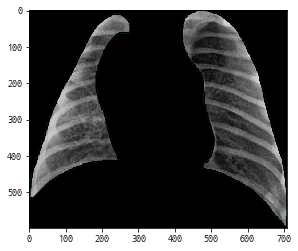

In [185]:
img_trim = img1[y_Min:y_Max, x_Min_0:x_Max_1]
plt.imshow(img_trim)


In [232]:
# print(len(contours))

In [44]:
# centres = []
# for i in range(len(contours)):
#     moments = cv2.moments(contours[i])
#     centres.append((int(moments['m10']/moments['m00']), int(moments['m01']/moments['m00'])))
#     cv2.circle(img1, centres[-1], 3, (0, 0, 0), -1)

# print(centres)

# plt.imshow(img1)
# cv2.imwrite('output.png',img)
# cv2.waitKey(0)

In [ ]:
# edged = cv2.Canny(img1, 10, 250)
# cv2.imshow('Edged', edged)
# cv2.waitKey(0)

In [12]:
def crop(path):
    img= cv2.imread(path)
    # gray scale
    img_gray  = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # threshold
    _, img_binary  = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
    # contour 잡기 (윤곽선은 투명)
    contours, hierarchy = cv2.findContours(img_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
    cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)
    
    # --------------------------------------------------------
    # contour[0]의 x,y min,max
    contours_min_0 = np.argmin(contours[0], axis=0)
    contours_max_0 = np.argmax(contours[0], axis=0)

    x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
    y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
    x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
    y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

    # contour[1]의 x,y min,max
    contours_min_1 = np.argmin(contours[1], axis=0)
    contours_max_1 = np.argmax(contours[1], axis=0)

    x_Min_1 = contours[1][contours_min_1[0][0]][0][0]
    y_Min_1 = contours[1][contours_min_1[0][1]][0][1]
    x_Max_1 = contours[1][contours_max_1[0][0]][0][0]
    y_Max_1 = contours[1][contours_max_1[0][1]][0][1]
    
    # --------------------------------------------------------
    
    if x_Min_0 < x_Min_1:  # x_Min_0이 작으면 
        x_Min = x_Min_0    # x_Min_0이 min값 
    else :
        x_Min = x_Min_1    # 같거나 크면 x_Min_1 min값

    if x_Max_0 > x_Max_1:  # x_Max_0이 크면 
        x_Max = x_Max_0    # x_Max_0이 max값 
    else :
        x_Max = x_Max_1    #같거나 크면 x_Max_1이 max값

    if y_Min_0 < y_Min_1:  # y_Min_0이 작으면 
        y_Min = y_Min_0    # y_Min_0이 min값 
    else :
        y_Min = y_Min_1    #같거나 크면 y_Min_1이 min값


    if y_Max_0 > y_Max_1:  # y_Max_0이 크면 
        y_Max = y_Max_0    # y_Max_0이 max값 
    else :
        y_Max = y_Max_1    #같거나 크면 y_Max_1이 max값
    
    img_trim = img[y_Min:y_Max, x_Min:x_Max]
    
    return img_trim

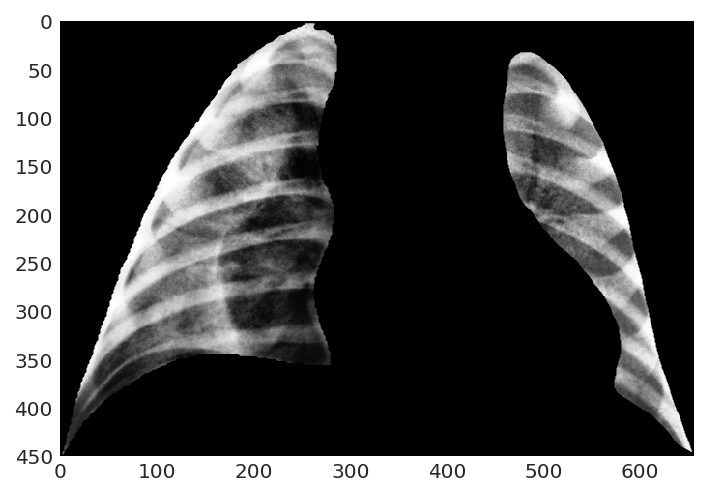

In [13]:
a = crop('/home/ncp/workspace/data/DL/d1/H03_00488_01.png')
plt.imshow(a)

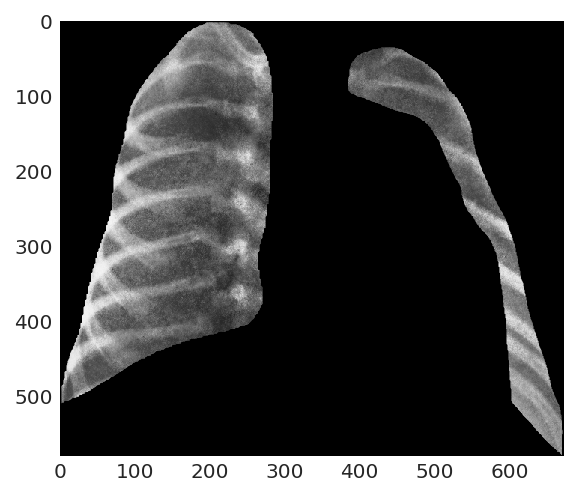

In [4]:
plt.imshow(crop('/home/ncp/workspace/data/DL/d4/H03_00329_01.png'))

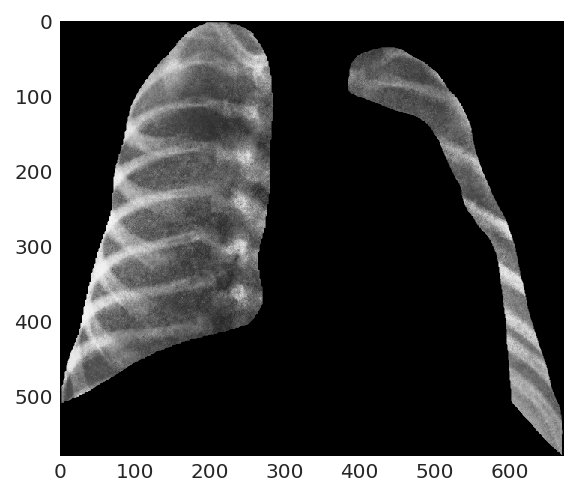

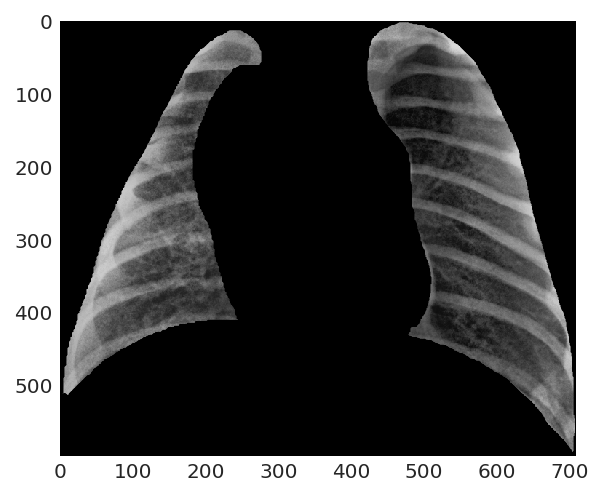

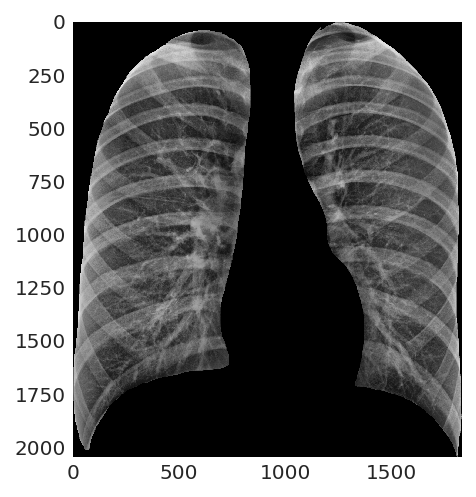

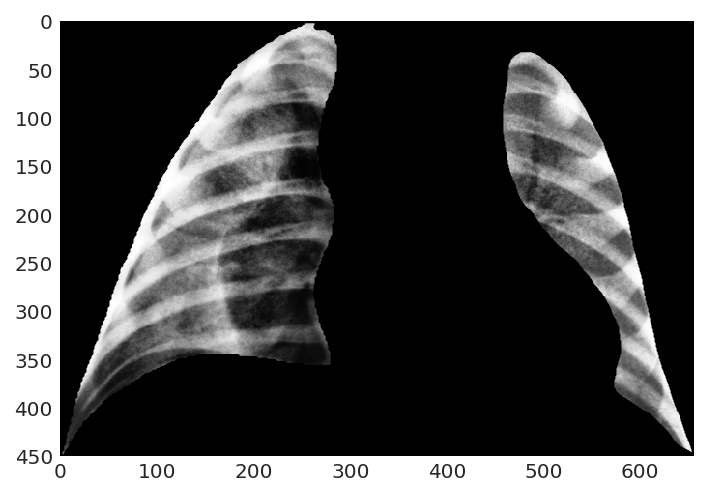

In [231]:
plt.imshow(crop('/home/ncp/workspace/data/DL/d4/H03_00329_01.png'))
plt.show()
plt.imshow(crop('/home/ncp/workspace/data/DL/d1/H05_00835_02.png'))
plt.show()

plt.imshow(crop('/home/ncp/workspace/data/DL/d1/H05_00799_01.png'))
plt.show()

plt.imshow(crop('/home/ncp/workspace/data/DL/d1/H03_00488_01.png'))
plt.show()


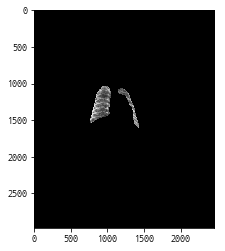

In [205]:
path= '/home/ncp/workspace/data/DL/d4'
img_01= cv2.imread(path+'/'+'H03_00329_01.png')
plt.imshow(img_01)

In [238]:
# img_01.shape

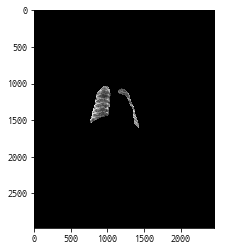

In [207]:
img_gray  = cv2.cvtColor(img_01, cv2.COLOR_BGR2GRAY)
_, img_binary  = cv2.threshold(img_gray, 0, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(img_binary , cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image=img_01, contours=contours, contourIdx=-1, color=None, thickness=2, lineType=cv2.LINE_AA)

plt.imshow(img_01)


In [208]:
# print(contours[0])
# print(contours[1])


In [209]:
contours_min_0 = np.argmin(contours[0], axis=0)
contours_max_0 = np.argmax(contours[0], axis=0)

x_Min_0 = contours[0][contours_min_0[0][0]][0][0]
y_Min_0 = contours[0][contours_min_0[0][1]][0][1]
x_Max_0 = contours[0][contours_max_0[0][0]][0][0]
y_Max_0 = contours[0][contours_max_0[0][1]][0][1]

# ---------------------------------------------------------
contours_min_1 = np.argmin(contours[1], axis=0)
contours_max_1 = np.argmax(contours[1], axis=0)

x_Min_1 = contours[1][contours_min_1[0][0]][0][0]
y_Min_1 = contours[1][contours_min_1[0][1]][0][1]
x_Max_1 = contours[1][contours_max_1[0][0]][0][0]
y_Max_1 = contours[1][contours_max_1[0][1]][0][1]

In [210]:
# print("x-Min0 =", x_Min_0)
# print("x-Max0 =", x_Max_0)
# print("y-Min0 =", y_Min_0)
# print("y-Max0 =", y_Max_0)

# print('\n\n')
# print("x-Min1=", x_Min_1)
# print("x-Max1=", x_Max_1)
# print("y-Min1 =", y_Min_1)
# print("y-Max1 =", y_Max_1)


In [211]:
if x_Min_0 < x_Min_1:  # x_Min_0이 작으면 
    x_Min = x_Min_0    # x_Min_0이 min값 
else :
    x_Min = x_Min_1    # 같거나 크면 x_Min_1 min값

if x_Max_0 > x_Max_1:  # x_Max_0이 크면 
    x_Max = x_Max_0    # x_Max_0이 max값 
else :
    x_Max = x_Max_1    #같거나 크면 x_Max_1이 max값

if y_Min_0 < y_Min_1:  # y_Min_0이 작으면 
    y_Min = y_Min_0    # y_Min_0이 min값 
else :
    y_Min = y_Min_1    #같거나 크면 y_Min_1이 min값


if y_Max_0 > y_Max_1:  # y_Max_0이 크면 
    y_Max = y_Max_0    # y_Max_0이 max값 
else :
    y_Max = y_Max_1    #같거나 크면 y_Max_1이 max값
    

In [239]:
# print("x-Min =", x_Min)
# print("y-Min =", y_Min)
# print("x-Max =", x_Max)
# print("y-Max =", y_Max)

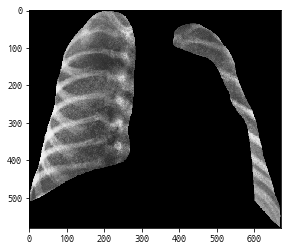

In [218]:
img_trim = img_01[y_Min:y_Max, x_Min:x_Max]
plt.imshow(img_trim)
# img_trim